In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn import cross_validation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from IPython.display import display
from IPython.core.pylabtools import getfigs

sns.set_context('talk')
sns.set_style('whitegrid') 


In [14]:
%matplotlib qt

In [15]:
def plotROCCurve(y_test, prediction_proba):
    fig = plt.figure(figsize=(4,4))
    fpr, tpr, thresholds = roc_curve(y_test, prediction_proba[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(bbox_to_anchor=(0.9, 0.2),
               bbox_transform=plt.gcf().transFigure)
    plt.savefig('random_forest_aucroc.png', bbox_inches='tight', dpi=200)

In [16]:
X_df = pd.read_pickle('new_X_df.save')
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [17]:
np.shape(X_df)

(115196, 38)

In [18]:
print list(X_df.columns)

['Goal', 'Campaign_days', 'Title_n_words', 'Blurb_n_words', 'Has_video', 'N_rewards', 'Min_reward', 'Median_reward', 'Max_reward', 'Reward_ship_days', 'N_links', 'N_figs', 'Body_n_words', 'N_creator_backed', 'N_creator_created', 'art', 'comics', 'crafts', 'dance', 'design', 'fashion', 'film', 'food', 'games', 'journalism', 'music', 'photography', 'publishing', 'technology', 'theater', 'Ships_intn', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [19]:
pred_subset = ['Goal', 'Title_n_words', 'Blurb_n_words','N_rewards', \
 'Median_reward', 'Max_reward', 'Reward_ship_days', 'N_links', 'N_figs',\
 'Body_n_words', 'N_creator_backed',]

In [38]:
pred_subset_smaller = ['Goal','N_creator_backed','N_rewards','Min_reward','Max_reward','Body_n_words',\
                       'art', 'comics', 'crafts', 'dance', 'design', 'fashion',\
                       'film', 'food', 'games', 'journalism', 'music', 'photography',\
                       'publishing', 'technology', 'theater',]

In [39]:
X_subset_df = X_df[pred_subset_smaller]

In [40]:
X_subset_df.head(2)

,Goal,N_creator_backed,N_rewards,Min_reward,Max_reward,Body_n_words,art,comics,crafts,dance,...,fashion,film,food,games,journalism,music,photography,publishing,technology,theater
0,5000,18,8,10,5000,812,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10000,7,10,5,5000,792,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
X_train, X_test, y_train, y_test = \
    cross_validation.train_test_split(X_subset_df, outcomes_df['Outcome'].values, \
                                      test_size=0.25, random_state=2) # was 0

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30, max_depth=10)
clf.fit(X_train,y_train)
y_1 = clf.predict(X_test)

In [43]:
y_1_proba = clf.predict_proba(X_test)

In [44]:
metrics.roc_auc_score(y_test, y_1_proba[:,1]) # average='macro',

0.82411662302490685

In [45]:
metrics.accuracy_score(y_test,y_1, normalize=True)

0.74328969755894303

In [46]:
metrics.precision_recall_fscore_support(y_test, y_1)

(array([ 0.76965877,  0.70177007]),
 array([ 0.80251006,  0.65927606]),
 array([ 0.7857412,  0.6798597]),
 array([16892, 11907]))

In [47]:
print metrics.classification_report(y_test, y_1)

             precision    recall  f1-score   support

          0       0.77      0.80      0.79     16892
          1       0.70      0.66      0.68     11907

avg / total       0.74      0.74      0.74     28799



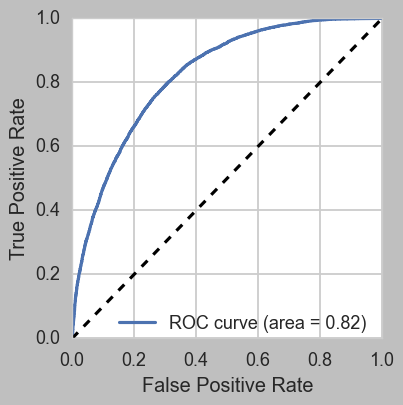

In [48]:
plotROCCurve(y_test, y_1_proba)
display(plt.gcf())

In [52]:
from plot_suggestions import *
%load_ext autoreload
%autoreload 2

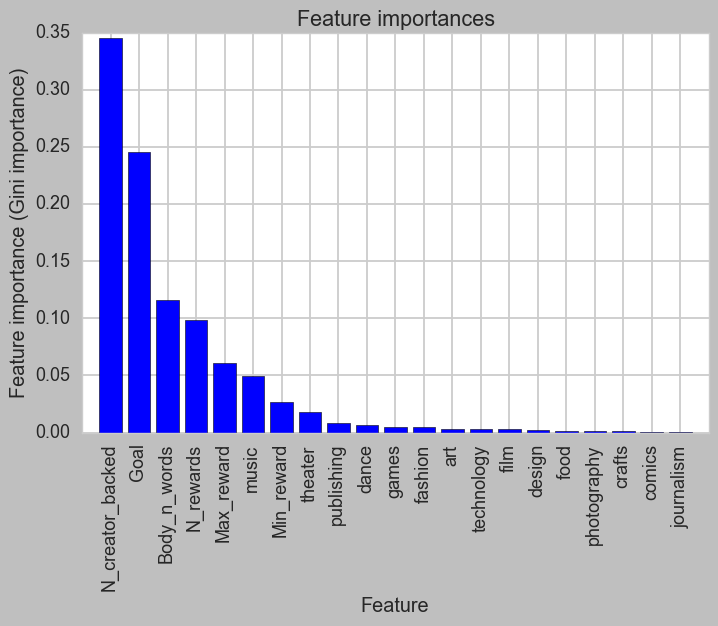

In [53]:
plot_feature_importances(clf.feature_importances_,\
                         X_subset_df.columns,n_top=len(X_subset_df.columns))
display(plt.gcf())

In [54]:
from sklearn.externals import joblib
joblib.dump(clf, 'small_clf/clf.pkl') 

['small_clf/clf.pkl',
 'small_clf/clf.pkl_01.npy',
 'small_clf/clf.pkl_02.npy',
 'small_clf/clf.pkl_03.npy',
 'small_clf/clf.pkl_04.npy',
 'small_clf/clf.pkl_05.npy',
 'small_clf/clf.pkl_06.npy',
 'small_clf/clf.pkl_07.npy',
 'small_clf/clf.pkl_08.npy',
 'small_clf/clf.pkl_09.npy',
 'small_clf/clf.pkl_10.npy',
 'small_clf/clf.pkl_11.npy',
 'small_clf/clf.pkl_12.npy',
 'small_clf/clf.pkl_13.npy',
 'small_clf/clf.pkl_14.npy',
 'small_clf/clf.pkl_15.npy',
 'small_clf/clf.pkl_16.npy',
 'small_clf/clf.pkl_17.npy',
 'small_clf/clf.pkl_18.npy',
 'small_clf/clf.pkl_19.npy',
 'small_clf/clf.pkl_20.npy',
 'small_clf/clf.pkl_21.npy',
 'small_clf/clf.pkl_22.npy',
 'small_clf/clf.pkl_23.npy',
 'small_clf/clf.pkl_24.npy',
 'small_clf/clf.pkl_25.npy',
 'small_clf/clf.pkl_26.npy',
 'small_clf/clf.pkl_27.npy',
 'small_clf/clf.pkl_28.npy',
 'small_clf/clf.pkl_29.npy',
 'small_clf/clf.pkl_30.npy',
 'small_clf/clf.pkl_31.npy',
 'small_clf/clf.pkl_32.npy',
 'small_clf/clf.pkl_33.npy',
 'small_clf/clf.pkl_3

In [55]:
subset_i = np.random.permutation(115196)[0:20] 

In [56]:
print subset_i

[  8800  33022 107749  64420    766  51465  17715  52979 114160  79142
  89577  14567  34907  60190  63581  33102  68168  83524  66880  83320]


In [57]:
small_X_df = X_subset_df.ix[subset_i,:]

In [58]:
small_X_df.head(3)

,Goal,N_creator_backed,N_rewards,Min_reward,Max_reward,Body_n_words,art,comics,crafts,dance,...,fashion,film,food,games,journalism,music,photography,publishing,technology,theater
8800,35000,2,22,5,10000,1415,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33022,4000,1,9,1,1000,466,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
107749,5000,14,6,25,250,250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
small_X_df.to_pickle('small_X_df.save')

In [60]:
small_X_array = small_X_df.values

In [61]:
print small_X_array

[[35000 2 22 5 10000 1415 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [4000 1 9 1 1000 466 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [5000 14 6 25 250 250 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5000000 0 9 1 10000 118 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [12500 1 3 10 100 1151 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [18000 45 14 1 425 785 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [7750 9 14 1 2000 698 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1000 13 8 1 110 1044 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [100000 0 3 10 50 377 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [24000 1 10 1 10000 409 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1700 0 5 1 150 361 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [15000 0 5 10 100 678 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [10000 1 5 25 1000 227 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [3500 0 2 5 10 114 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [3500 0 1 15 15 301 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [3500 0 12 1 1500 537 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [3600 15 8 5 1000 1241 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [15000 0 4 10 150 584 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [500 1 8 10 1000 650 0 

In [62]:
small_X_array.dump('small_X_array.save')

In [63]:
print list(small_X_df.columns)

['Goal', 'N_creator_backed', 'N_rewards', 'Min_reward', 'Max_reward', 'Body_n_words', 'art', 'comics', 'crafts', 'dance', 'design', 'fashion', 'film', 'food', 'games', 'journalism', 'music', 'photography', 'publishing', 'technology', 'theater']


In [64]:
col_names = np.array(small_X_df.columns)
print col_names

['Goal' 'N_creator_backed' 'N_rewards' 'Min_reward' 'Max_reward'
 'Body_n_words' 'art' 'comics' 'crafts' 'dance' 'design' 'fashion' 'film'
 'food' 'games' 'journalism' 'music' 'photography' 'publishing'
 'technology' 'theater']


In [65]:
col_names.dump('small_X_array_columns.save')